<a href="https://colab.research.google.com/github/willsacraa/RedesNeurais/blob/main/Classifica%C3%A7%C3%A3o/William_01_Pre_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Pré-processamento dos dados para classificação</font>

## Montando DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

drive_dados = '/content/drive/MyDrive/RedesNeurais/Classificacao/'

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

drive_dados = '/content/drive/MyDrive/UFSB/Componentes_curriculares/RNA/_01_Classificacao/' # Colocar uma barra no final do endereço

## 1) Importando bibliotecas e definindo colunas do dataset

Importar as bibliotecas e o arquivo que serão utilizadas durante as análises. 

In [ ]:
# Imports bilbliotecas básica
# ===========================
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

# Imports bilbliotecas com funções importantes
# ============================================
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Colunas do dataset

Fonte dos dados

####  Attribute Information:

<p>a1 Sex</p>
<p>a2 Age</p>
<p>a3 Time</p>
<p>a4 Number of Warts</p>
<p>a5 Type</p>
<p>a6 Area</p>
<p>a7 Induration Diameter</p>
<p>d1 Result of Treatment</p>
    
    
https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset

In [ ]:
# Definindo das colunas do dataset
names_columns = ["Sex", 
                 "Age",
                 "Time", 
                 "Number of Warts",
                 "Type",
                 "Area",
                 "Induration Diameter", 
                 "Result of Treatment"] 

## 2) Exemplo de extração dos dados de um ou mais 
## <font color='blue'>arquivos excel

### 2.1) Lendo um arquivo excel

In [ ]:
arquivo = drive_dados + "Immunotherapy.xlsx"
dataset = pd.read_excel(arquivo, dtype = str)
# Verificando as primeiras linhas do dataset
dataset.head(5)

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3,2,3,900,70,1
2,1,16,10.5,2,1,100,25,1
3,1,27,4.5,9,3,80,30,1
4,1,20,8,6,1,45,8,1


## 3) Como preparar um dataset: 
### Passo a passo

Ciência de dados na prática: entendendo processos essenciais para limpar e preparar um banco de dados.

A ideia é que consigamos montar um checklist do que é necessário fazer para preparar um dataset antes de começar a analisá-lo de fato

In [ ]:
# Verificando a quantidade de linhas e colunas
print(dataset.shape)

(90, 8)


### 3.1) Verificando o tipo de dados

In [ ]:
# Tipos de Dados
dataset.dtypes

sex                    int32
age                    int32
Number_of_Warts        int32
Type                   int32
Area                   int32
induration_diameter    int32
Result_of_Treatment    int32
dtype: object

#### 3.1.1) Mudando o tipo de um atributo

In [ ]:
dataset[:] = dataset[:].astype(np.int32)
# Tipos possíveis: np.bool_ , np.int_ , np.int64 , np..int32 , np.float64 , np.float_, np.double
#                  np.complex128 , np.complex_ , np.cdouble , np.object_ , np.str_ , np.int_ , np.longlong
#                  np.unicode_
# Alternativa:
# ===========
# dataset['_nome_coluna_'] = pd.to_numeric(dataset['_nome_coluna_'],errors='coerce')

### 3.2) Removendo colunas / linhas do DataFrame


Sempre que vamos analisar um dataset, concluiremos que nem todas as colunas que estão presentes são úteis.

Manter esses dados seria uma demanda desnecessária de recursos de processamento e de memória.
Por conta disso, a biblioteca Pandas disponibiliza o método drop() para remover linhas e colunas da tabela.

#### 3.2.1) Removendo colunas do DataFrame

In [ ]:
# EXCLUINDO COLUNAS
# A modificação não será gravada no dataset a menos que façamos a atribuição com inplace=True
dataset.drop(columns = ["Time"], inplace=True)

### 3.3) Verificando duplicatas de dados

Valores duplicados são encontrados com frequência e dependendo da análise que será feita, esses valores podem alterar o resultado final.
É importante realizar esse procedimento para garantir que os dados sejam únicos nas análises.

O método duplicated() devolve uma Series booleana informando se possui algum valor duplicado.
Referente a isso, entramos com o drop_duplicates(), que remove todos os valores repetidos.

In [ ]:
# Verificando duplicatas das linhas
duplicatas = dataset[dataset.duplicated()]
print(duplicatas.shape)
duplicatas.head()

(0, 8)


,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment


### 3.4) Verificando valores nulos (missing)

Verificamos se existem valores nulos. 
Se a base apresenta muitos valores nulos, será necessário tratá-las.

Todavia, antes de sair substituindo os valores, é preciso entender o que cada coluna representa, bem como criar colunas novas para marcar aqueles valores que foram incluídos manualmente na base.

São algumas das ações que podemos tomar:
<ol>
<li>Dropar a coluna que contenha dados nulos;</li>
<li>Dropar apenas as linhas com dados nulos;</li>
<li>Substituir pela média da coluna;</li>
<li>Substituir por um valor fixo.</li>
</ol>

In [ ]:
# Verificando se existem valores nulos
dataset.isnull().values.any()

False

In [ ]:
# Verificação da quantidade de valores nulos dentro do DataFrame
print(dataset.isna().sum())
print(f'\nTotal de valores missing: {dataset.isna().sum().sum()}')

sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

Total de valores missing: 0


## 4) Aleatorização do conjunto de dados

In [ ]:
ordem = dataset.sample(dataset.shape[0]).index
dataset = dataset.iloc[ordem]
print(dataset.shape)

(90, 8)


## 5) Cria o encoder para a variável categórica de saída (label)

<font color='red'>a) Verificando as quantidade de ocorrência para cada evento na variável resposta

In [ ]:
column_label_ini = 'Result_of_Treatment'
target_count = pd.DataFrame(dataset[column_label_ini].value_counts())
target_count.reset_index(level=0, inplace=True)
target_count.rename(columns={column_label_ini: 'QT', 'index': column_label_ini}, inplace=True)
target_count.set_index(column_label_ini, inplace=True)
target_count.sort_index(axis=0, inplace=True)
target_count

,QT
Result_of_Treatment,
0,19
1,71


<font color='red'>b) Defini a quantidade minima de ocorrências em cada classe.</font> 

Apaga ocorrências com menor número.

In [ ]:
quant_minima = 0
# Desfazendo a indexação
target_count.reset_index(level=0, inplace=True)
for index in target_count[target_count['QT'] < quant_minima ].index:
    indexNames = target_count[column_label_ini][index]
    indexDataset = dataset[dataset[column_label_ini] == indexNames].index
    dataset.drop(indexDataset , inplace=True)
print(dataset.shape)

(90, 7)


<font color='red'>c) Apaga ocorrências de classes indesejadas

In [ ]:
# Apaga valores 
# A modificação não será gravada no dataset a menos que façamos a atribuição com inplace=True
apaga = [1]
for i in range(len(apaga)):
    dataset.drop([dataset.loc[dataset[column_label_ini] == valor].index for valor in apaga][i], axis = 0, inplace=False)

<font color='red'>d) Mostra graficamente as classes existentes antes da alteração do label por encoder.

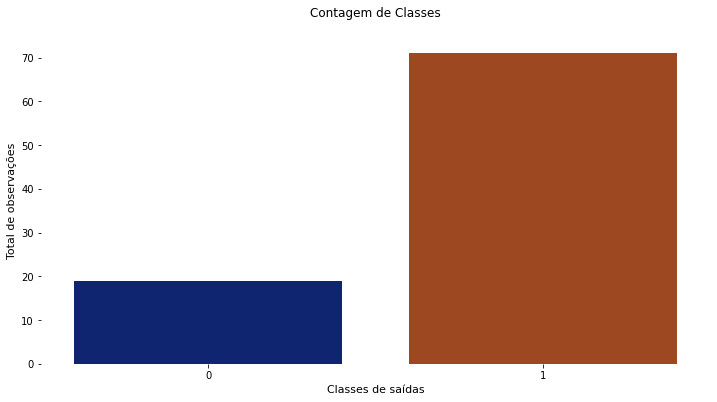

In [ ]:
# Plot 
FIGSIZE = (12, 6)
fig = plt.figure(figsize = FIGSIZE)
sns.countplot(x=dataset[column_label_ini], palette = "dark")
plt.box(False)
plt.xlabel('Classes de saídas', fontsize = 11)
plt.ylabel('Total de observações', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

<font color='red'>e) Cria o encoder (label)

In [ ]:
lb = LabelEncoder()
column_label_end = 'label'
dataset.loc[:,column_label_end] = lb.fit_transform(dataset[column_label_ini])
dataset

,sex,age,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment,label
89,2,23,6,1,19,2,1,1
32,2,48,7,1,50,25,1,1
11,2,17,12,3,25,7,1,1
55,1,54,13,3,43,5,1,1
38,2,22,5,1,99,8,1,1
...,...,...,...,...,...,...,...,...
73,2,51,1,1,65,7,1,1
85,1,40,8,3,69,5,1,1
81,2,16,11,1,47,7,1,1
4,1,20,6,1,45,8,1,1


<font color='red'>e) Mostra graficamente as classes existentes DEPOIS da alteração da variável de saída por encoder. 

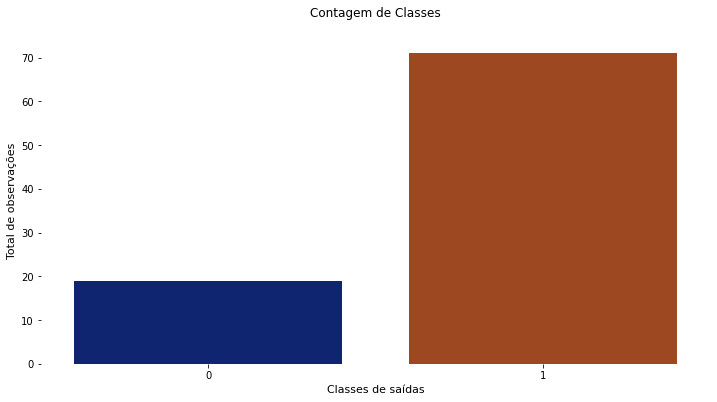

In [ ]:
FIGSIZE = (12, 6)
fig = plt.figure(figsize = FIGSIZE)
sns.countplot(x=dataset[column_label_end], palette = "dark")
plt.box(False)
plt.xlabel('Classes de saídas', fontsize = 11)
plt.ylabel('Total de observações', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

### 6) Salvando o banco de dados após pre-processamento

In [ ]:
dataset.to_csv(drive_dados + 'Dados_pre_processados.csv', index = True)
dataset

,sex,age,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment,label
89,2,23,6,1,19,2,1,1
32,2,48,7,1,50,25,1,1
11,2,17,12,3,25,7,1,1
55,1,54,13,3,43,5,1,1
38,2,22,5,1,99,8,1,1
...,...,...,...,...,...,...,...,...
73,2,51,1,1,65,7,1,1
85,1,40,8,3,69,5,1,1
81,2,16,11,1,47,7,1,1
4,1,20,6,1,45,8,1,1


### 7) Mostrando a tabela decoder

In [ ]:
columns=[column_label_end, column_label_ini]
tab_decoder = dataset[columns]
tab_decoder = tab_decoder.sort_values(by=[column_label_end]).drop_duplicates().set_index(column_label_end)
tab_decoder

,Result_of_Treatment
label,
0,0
1,1


#### 7.1) Gravando tabela

In [ ]:
import pickle
# Gravando o modelo
#pickle.dump((tab_decoder) , open('tab_decoder_consideradas.sav', 'wb'))
pickle.dump((tab_decoder) , open(drive_dados + 'tab_decoder.sav', 'wb'))